RMSE: 4739.630097416608


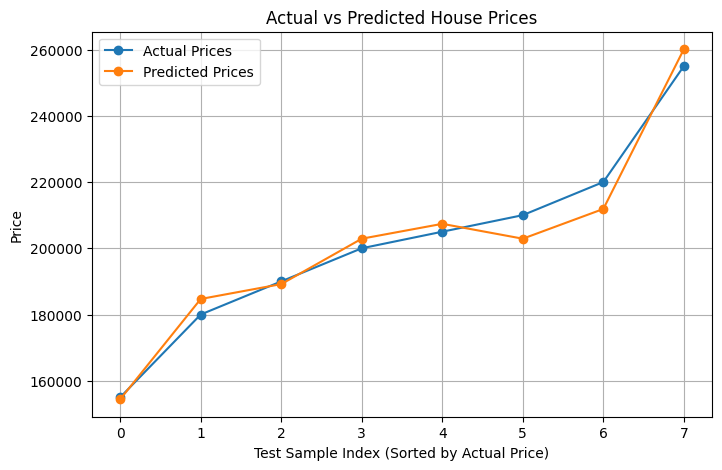

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data = {
    'Area': [1000, 1200, 850, 1600, 1400, 1800, 1100, 950, 2000, 1700,
             1250, 1350, 1500, 1650, 1550, 1300, 1450, 1750, 1900, 1050,
             2100, 2200, 1150, 950, 1350, 1600, 1250, 1400, 2300, 2400,
             1500, 1450, 1000, 1800, 1950, 2050, 1700, 1900, 1550, 1200],
    
    'Bedrooms': [2, 3, 2, 3, 3, 4, 2, 2, 4, 3,
                 3, 3, 3, 3, 3, 3, 3, 4, 4, 2,
                 4, 4, 2, 2, 3, 3, 3, 3, 4, 5,
                 3, 3, 2, 4, 4, 4, 3, 4, 3, 3],
    
    'Bathrooms': [1, 2, 1, 2, 2, 2, 1, 1, 3, 2,
                  2, 2, 2, 2, 2, 2, 2, 3, 3, 1,
                  3, 3, 1, 1, 2, 2, 2, 2, 3, 4,
                  2, 2, 1, 3, 3, 3, 2, 3, 2, 2],
    
    'Garage': [1, 1, 0, 1, 2, 2, 1, 0, 2, 2,
               1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
               2, 2, 1, 0, 1, 2, 1, 2, 2, 3,
               2, 2, 1, 2, 2, 2, 2, 2, 2, 1],
    
    'Price': [150000, 180000, 130000, 200000, 210000, 250000, 160000, 140000,
              270000, 230000, 185000, 195000, 220000, 225000, 215000, 190000,
              205000, 240000, 260000, 155000,
              280000, 295000, 165000, 145000, 190000, 210000, 180000, 200000,
              300000, 320000, 215000, 210000, 160000, 260000, 265000, 275000,
              225000, 255000, 215000, 180000]
}


df= pd.DataFrame(data)

#Our features and Target

X= df[['Area', 'Bedrooms', 'Bathrooms', 'Garage']]
Y= df['Price']

#Train/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Model
model= LinearRegression()
model.fit(X_train, Y_train)

#Prediction
predictions=model.predict(X_test)

#Evaluation
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
print("RMSE:", rmse)

import numpy as np

# Sort the test data for smoother line plot
sorted_indices = np.argsort(Y_test.values)
sorted_actual = Y_test.values[sorted_indices]
sorted_predicted = predictions[sorted_indices]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(sorted_actual, label='Actual Prices', marker='o')
plt.plot(sorted_predicted, label='Predicted Prices', marker='o')
plt.xlabel("Test Sample Index (Sorted by Actual Price)")
plt.ylabel("Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()

